# Иерархическая кластеризация


Используем реализацию [иерархической кластеризации](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) в [scikit-learn](https://scikit-learn.org/stable/index.html) (метод [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html))

In [46]:
import pandas as pd
import numpy as np

from sklearn import preprocessing  # методы для предварительной обработки данных (нормирование etc)
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram # Построение дендрограммы

import seaborn as sns # 2D-визуалиазция
import plotly.express as px # 3D-визуалиазация
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('Countries.csv', sep=';', decimal=',')
data.head()

,Страны,ИРЧП,ВВП д/н,Население,Темп роста промышленности,Безработица (%),Ожидаемая продолжительность жизни,Кол-во действующих войск на тысячу граждан,Уровень смертности (на 1000 чел.)
0,Норвегия,0.94,52238.0,4943000.0,0.3,3.6,81.0,5.79,9.1
1,Австралия,0.94,39692.0,22696000.0,3.0,5.1,81.9,3.59,7.1
2,Новая Зеландия,0.91,27460.0,4427700.0,2.0,6.5,80.6,2.69,7.1
3,США,0.90,47123.0,311028000.0,3.3,9.7,79.6,4.76,8.2
4,Нидерланды,0.89,40777.0,16691100.0,3.2,5.5,80.3,3.24,8.6


In [35]:
countries = list(data['Страны'])

In [36]:
# Удалим нечисловые переменные
data = data.drop(columns=['Страны'])
data

,ИРЧП,ВВП д/н,Население,Темп роста промышленности,Безработица (%),Ожидаемая продолжительность жизни,Кол-во действующих войск на тысячу граждан,Уровень смертности (на 1000 чел.)
0,0.94,52238.0,4.943000e+06,0.3,3.6,81.0,5.79,9.1
1,0.94,39692.0,2.269600e+07,3.0,5.1,81.9,3.59,7.1
2,0.91,27460.0,4.427700e+06,2.0,6.5,80.6,2.69,7.1
3,0.90,47123.0,3.110280e+08,3.3,9.7,79.6,4.76,8.2
4,0.89,40777.0,1.669110e+07,3.2,5.5,80.3,3.24,8.6
...,...,...,...,...,...,...,...,...
57,0.60,4380.0,2.313690e+08,3.6,7.1,71.5,1.26,6.3
58,0.57,4773.0,3.214000e+07,4.4,9.8,71.8,6.23,5.8
59,0.52,3290.0,1.210868e+09,9.7,10.8,64.4,1.20,8.2
60,0.49,2789.0,1.725465e+08,4.9,5.5,67.2,3.72,7.1


## Нормирование данных

In [37]:
data_norm = preprocessing.StandardScaler(with_mean=True, with_std=True).fit_transform(data)
# data_norm = preprocessing.MinMaxScaler().fit_transform(data)
# data_norm = preprocessing.RobustScaler().fit_transform(data)

## Дендрограмма
Дендрограмма существенно зависит от выбора расстояния.

Нужно выбирать тот метод, который приведет к хорошо интерпретируемым кластерам

In [38]:
mergings = linkage(data_norm, method='ward')  # попробуем прогнать несколько раз, меняя method

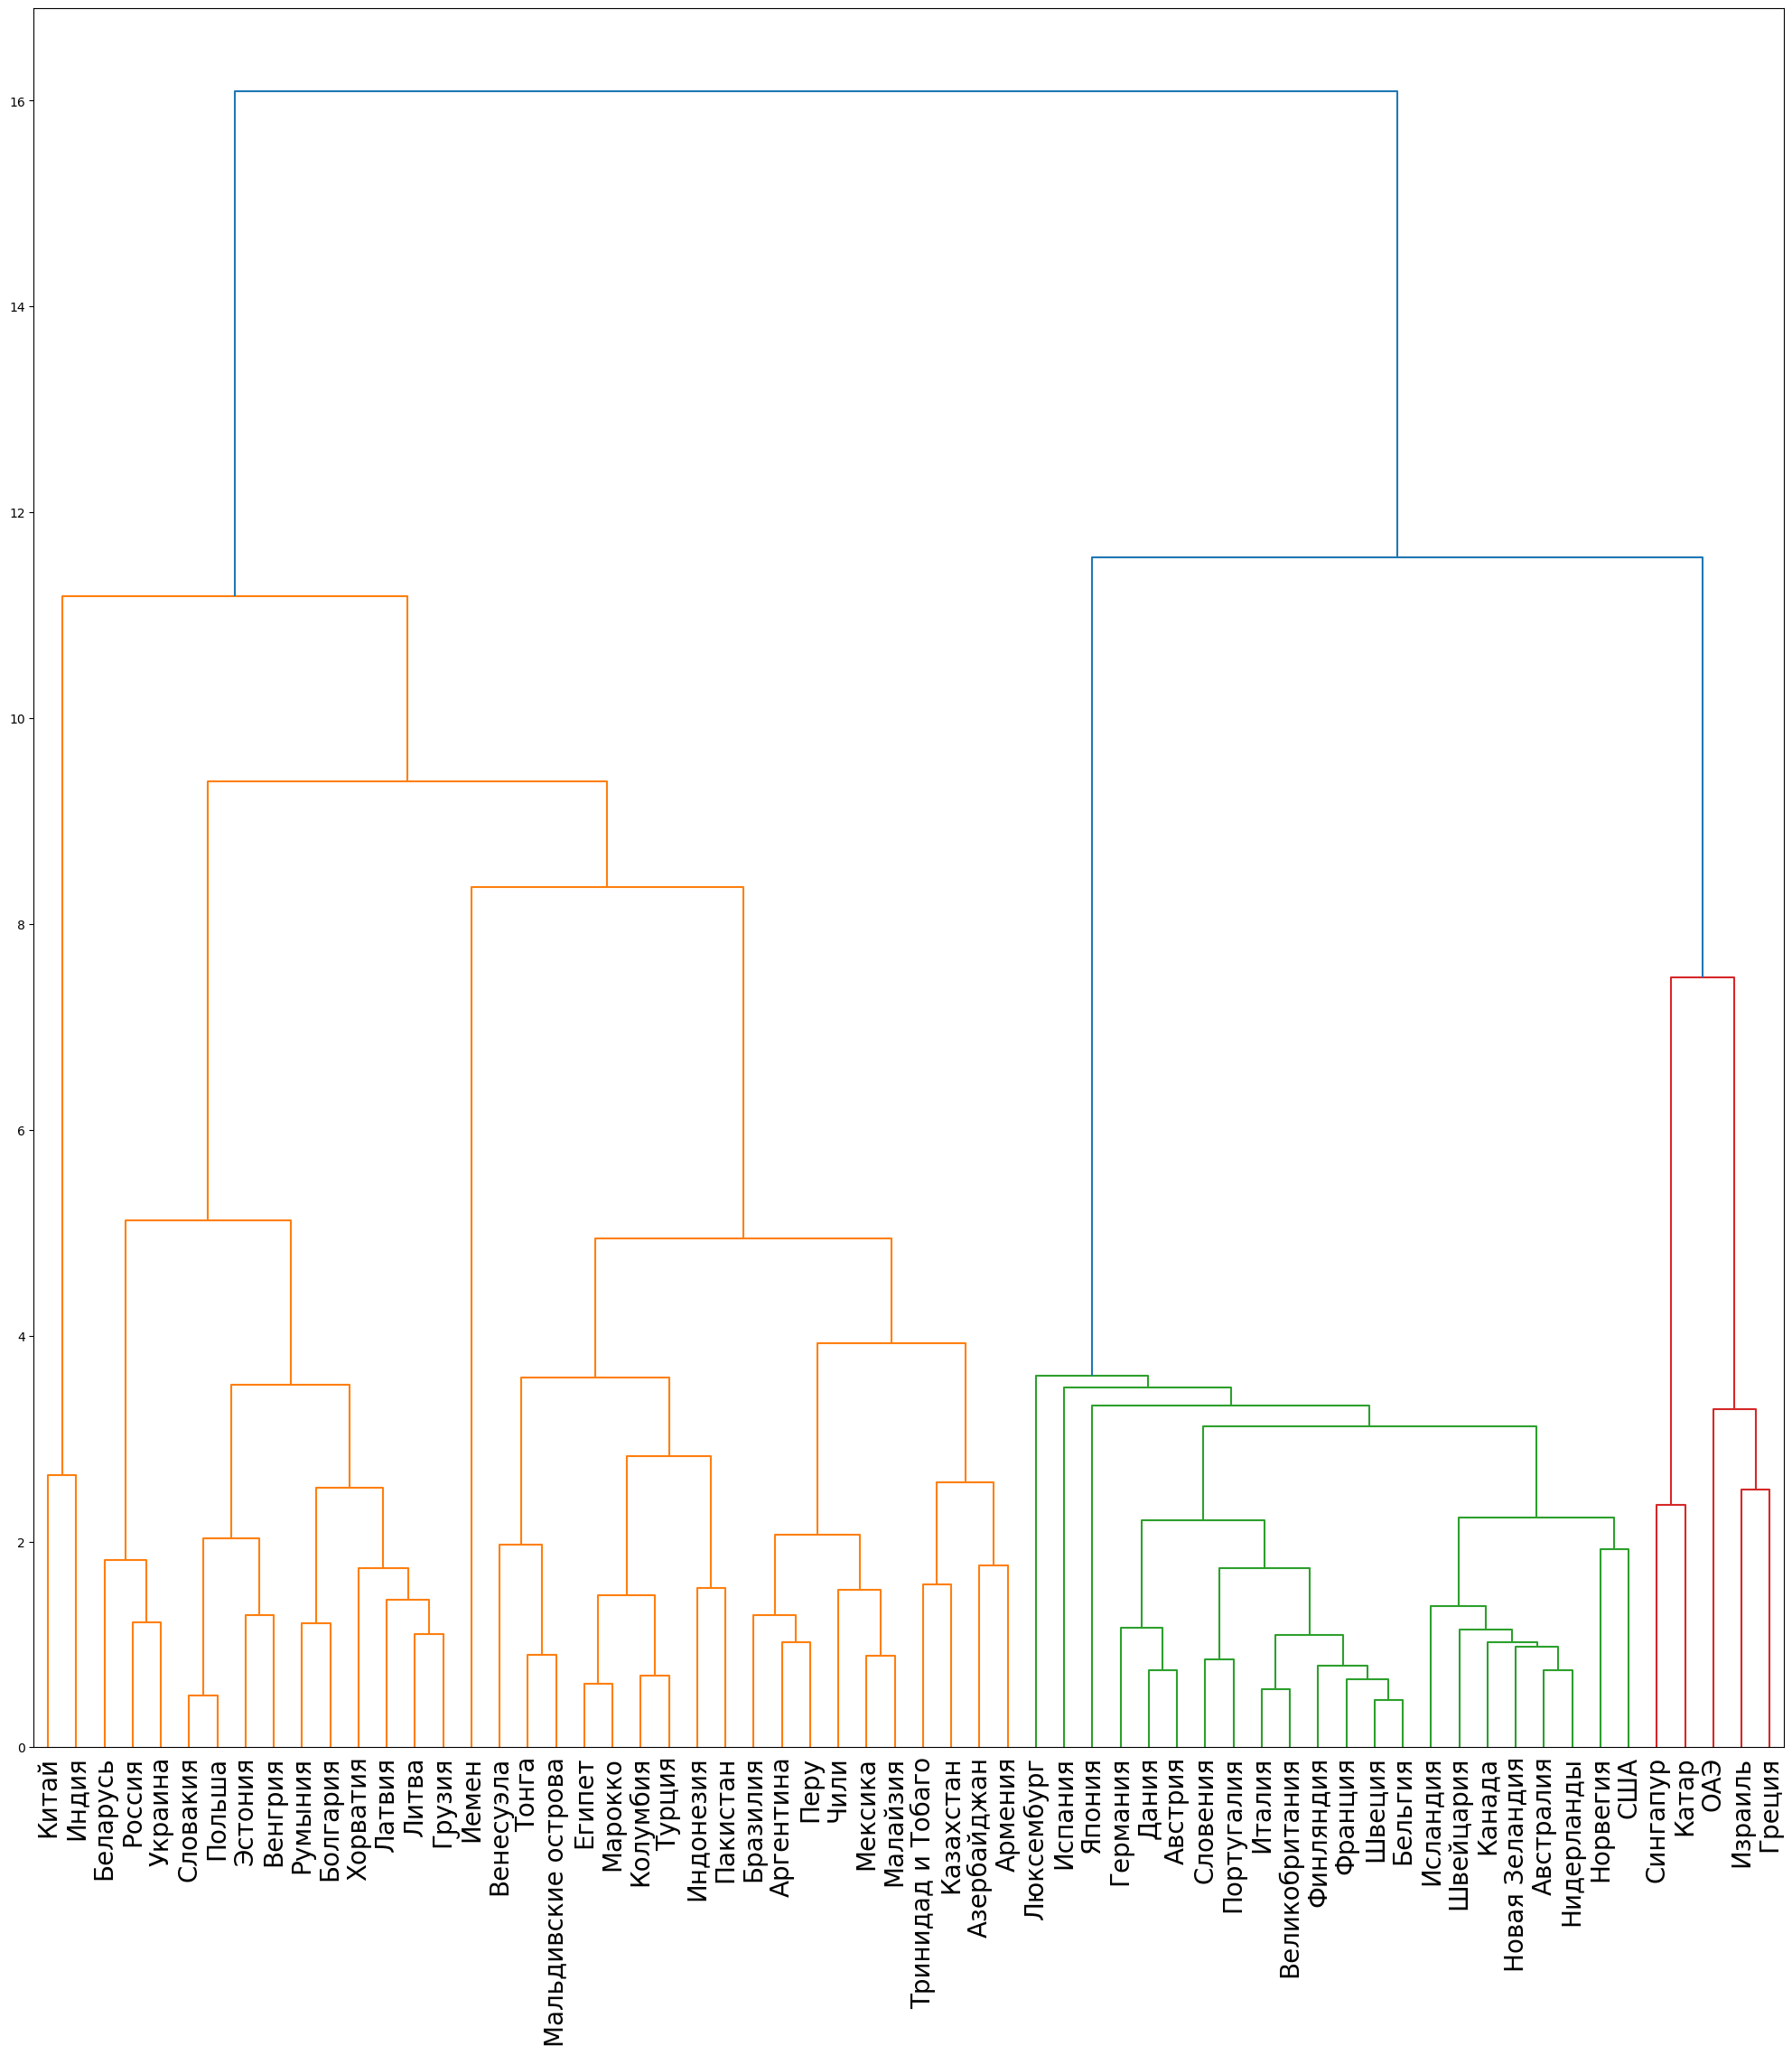

In [39]:
plt.figure(figsize=(25, 25))  # размер картинки

dendrogram(mergings,
           labels=countries,
           leaf_rotation=90,
           leaf_font_size=20,
           )

plt.show()

## Кластеризация

In [40]:
# Специфицируем процедуру
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', 
                                  linkage='ward', compute_full_tree=True, distance_threshold=None)
# проводим кластеризацию
cl = cluster.fit_predict(data_norm)

print(cl)

[2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 0 1 0 0 1 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Визуализация
используем библиотеки [seaborn](https://seaborn.pydata.org/index.html) и [plotly](https://plotly.com/python/)

In [41]:
data.insert(loc=0, column='Cluster', value=cl)
data.head()

,Cluster,ИРЧП,ВВП д/н,Население,Темп роста промышленности,Безработица (%),Ожидаемая продолжительность жизни,Кол-во действующих войск на тысячу граждан,Уровень смертности (на 1000 чел.)
0,2,0.94,52238.0,4943000.0,0.3,3.6,81.0,5.79,9.1
1,2,0.94,39692.0,22696000.0,3.0,5.1,81.9,3.59,7.1
2,2,0.91,27460.0,4427700.0,2.0,6.5,80.6,2.69,7.1
3,2,0.90,47123.0,311028000.0,3.3,9.7,79.6,4.76,8.2
4,2,0.89,40777.0,16691100.0,3.2,5.5,80.3,3.24,8.6


<Axes: xlabel='ИРЧП', ylabel='Население'>

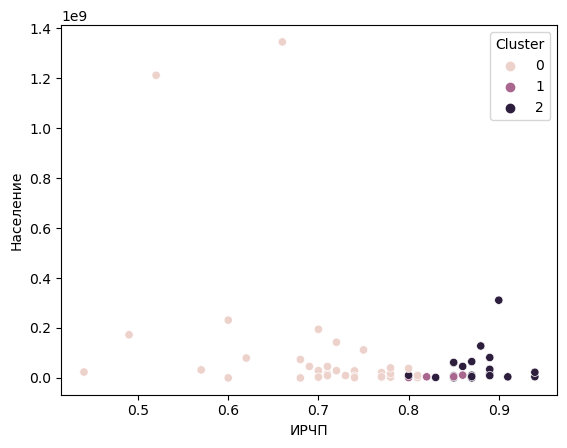

In [42]:
sns.scatterplot(data=data, x='ИРЧП', y='Население', hue='Cluster')

<Axes: xlabel='ИРЧП', ylabel='ВВП д/н'>

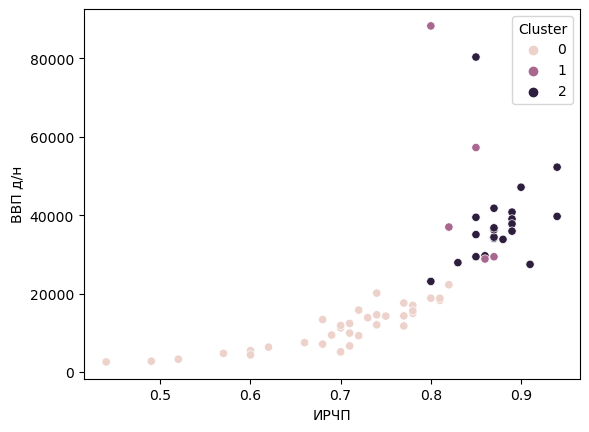

In [43]:
sns.scatterplot(data=data, x='ИРЧП', y='ВВП д/н', hue='Cluster')

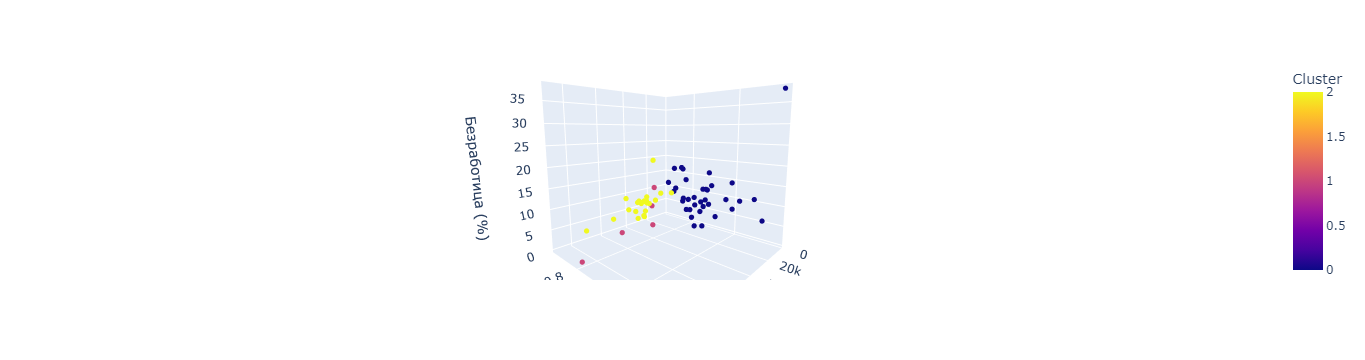

In [45]:
fig = px.scatter_3d(data, x='ИРЧП', y='ВВП д/н', z='Безработица (%)', color='Cluster')
fig.update_traces(marker_size=3)
fig.show()